# <font color = 'indianred'> **HW2 : KNN Classification and Cross Validation-10 Points**

You have to submit two files for this part of the  HW
1. FirstNameLastName_Hw2b.ipynb (colab notebook)
2. FirstNameLastName_Hw2b.pdf pdf file


# <font color = 'indianred'> **Import Libraries**

<font size = 4, color = 'indianred'> **Add any library you need for completing this HW in the cell below**.</font>

In [2]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# code here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.neighbors import KNeighborsClassifier

# <font color = 'indianred'>**Load Dataset**

In [3]:
iris_dataset = load_iris()

# <font color = 'indianred'>**Inspect Data**

In [4]:
# check dataset type
type(iris_dataset)

sklearn.utils._bunch.Bunch

<font color = 'indianred'>Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.

In [5]:
# check various keys to see what attrinbutes the data have
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
iris_dataset.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [7]:
# get independent variable(feature) names
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# get dependent variable(target) names
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# check the first five rows of the data (inmdependent variables)
iris_dataset.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
# check values for dependent variables
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# check the shape of the dataset
iris_dataset.data.shape

(150, 4)

# <font color = 'indianred'> **Slpit data**

## <font color = 'indianred'> Task 1 Split the data into Train/Test splits
Create X_train, X_test, y_train, y_test by splitting  the data.

In [12]:
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [13]:
print(f"X_train shape {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape (112, 4)
y_train shape: (112,)


# <font color = 'indianred'> **Visualize data**

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

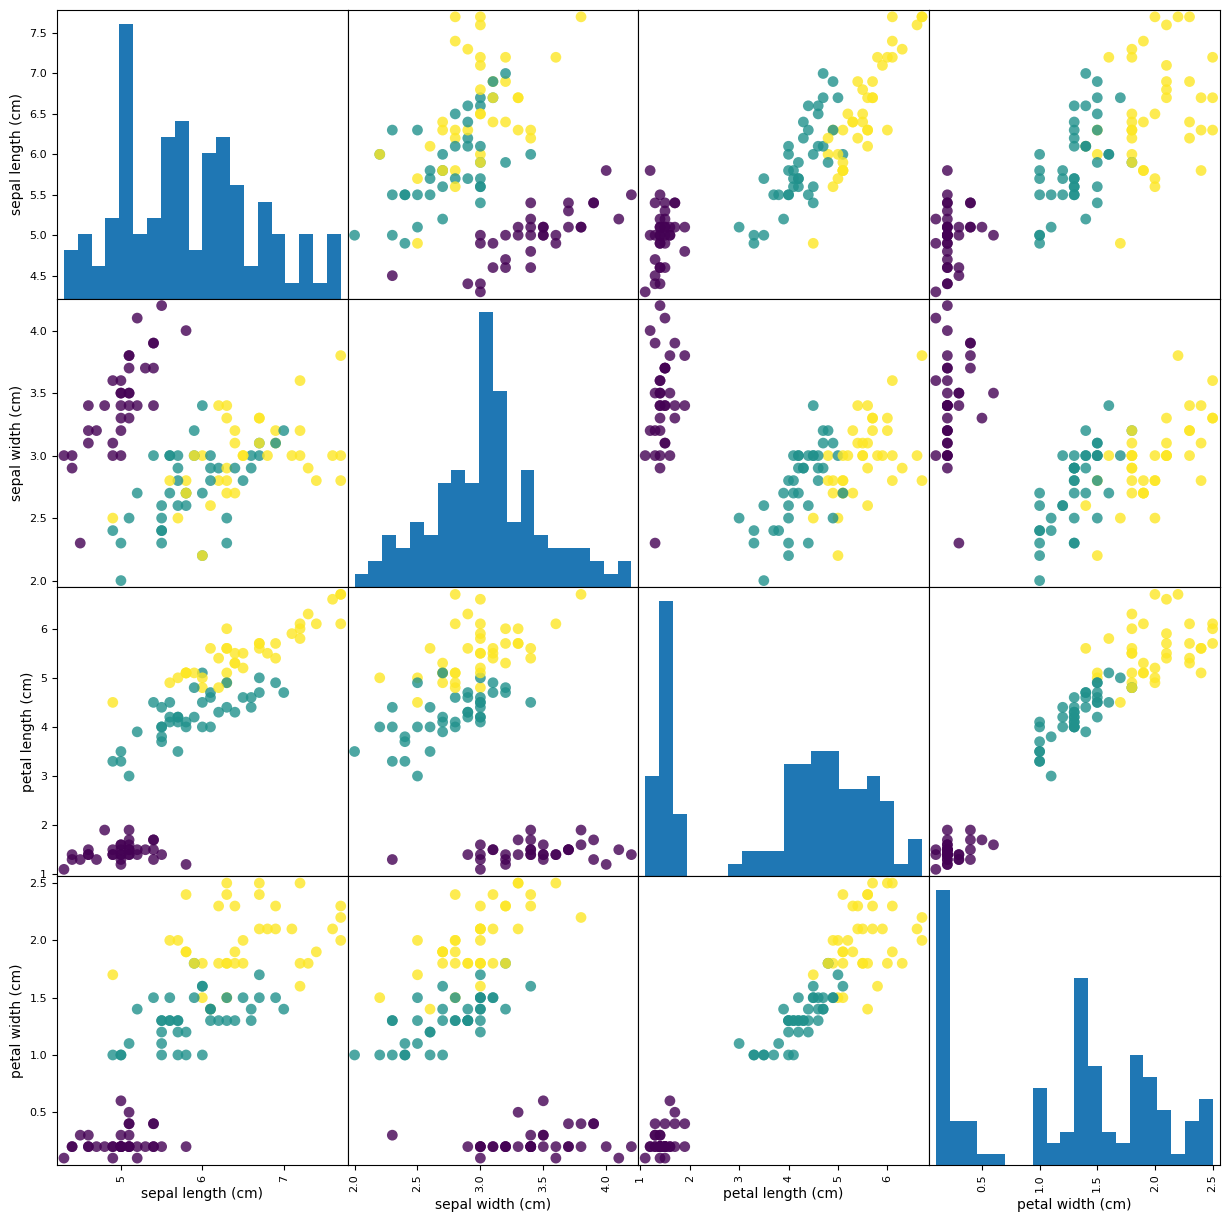

In [14]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

In [15]:
 # check the information for each column in the data
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  112 non-null    float64
 1   sepal width (cm)   112 non-null    float64
 2   petal length (cm)  112 non-null    float64
 3   petal width (cm)   112 non-null    float64
dtypes: float64(4)
memory usage: 3.6 KB


In [16]:
# check the summary statistics for the columns with numerical values
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.830357,3.040179,3.807143,1.214286
std,0.819123,0.437120,1.735310,0.747953
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


# <font color = 'indianred'> **KNN Classification Model**

## <font color = 'indianred'> **Task 2- k-fold**

<font sie = 4, color = 'indianred'>

- Fit the KNN Classifiation model on iris data.
- Finetune the hyperparameter -- n_neighbors using GridSearchCV.
- In GridSearchCV use **k-fold** (with 5 splits) for cross validation.
- Print the value of n_neighbors that gives the best fit.
- Print the best mean cross validation score.
- Use the trained model to get accuracy on train and test data sets.
- Print the accuracy for train and test data sets.</font>

In [17]:
param_grid_1 = {'n_neighbors':  np.arange(1, 16, 1)}


# specify the cross-validation startegy - use k-fold for this task

folds = KFold(n_splits = 5, random_state = 42, shuffle = True)

# Use GridSearchCV for kNN classification

grid_1 = GridSearchCV(KNeighborsClassifier(), cv = folds, param_grid = param_grid_1, return_train_score = True)

# Now fit the  GridSearchCV on the X_train, y_train by using fit() method

grid_1.fit(X_train, y_train)


print(f"best mean cross-validation score: {grid_1.best_score_}")
print(f"best parameters: {grid_1.best_params_}")

# We can check the accuracy score of training dataset and test dataset.
print(f"train-set score: {grid_1.score(X_train, y_train):.3f}")
print(f"test-set score: {grid_1.score(X_test, y_test):.3f}")

best mean cross-validation score: 0.9462450592885375
best parameters: {'n_neighbors': 13}
train-set score: 0.964
test-set score: 1.000


## <font color = 'indianred'> **Task 3- Stratified k-fold**

<font sie = 4, color = 'indianred'>

- Repeat Task 2 but use stratified k-fold for cross-validation.
- Stratified k-fold is the default strategy for GridSearchCV.
- We will again use 5 splits.</font>

In [18]:
param_grid_2 = {'n_neighbors':  np.arange(1, 16, 1)}


# Use GridSearchCV for kNN classification
# We do not need to specify the croass validation startegy as stratified k-fold is the
# default strategy. Just use cv = # number of splits inside GridSearchCV

grid_2 = GridSearchCV(KNeighborsClassifier(), cv = 5, param_grid = param_grid_2, return_train_score = True)

# Now fit the  GridSearchCV on the X_train, y_train by using fit() method

grid_2.fit(X_train, y_train)

print(f"best mean cross-validation score: {grid_2.best_score_}")
print(f"best parameters: {grid_2.best_params_}")

# We can check the accuracy score of training dataset and test dataset.
print(f"train-set score: {grid_2.score(X_train, y_train):.3f}")
print(f"test-set score: {grid_2.score(X_test, y_test):.3f}")

best mean cross-validation score: 0.9644268774703558
best parameters: {'n_neighbors': 4}
train-set score: 0.964
test-set score: 1.000


## <font color = 'indianred'> **Task 4- Stratified Shuffle Split**

<font sie = 4, color = 'indianred'>

- Repeat Task 2 but use Stratified Shuffle Split in  GridSearchCV.
- We will again use 5 splits.
- For each split we will use 40% of the data for train split and 40% of the data for validation/test split**</font>

In [19]:
param_grid_3 = {'n_neighbors':  np.arange(1, 16, 1)}

# specify the cross-validation startegy - use Stratified Shuffle Split for this task
folds = StratifiedShuffleSplit(n_splits = 5, random_state = 42, test_size = 0.4)


# Use GridSearchCV with kNN classification
grid_3 = GridSearchCV(KNeighborsClassifier(), cv = folds, param_grid = param_grid_3, return_train_score = True)

# Now fit the  GridSearchCV on the X_train, y_train by using fit() method

grid_3.fit(X_train, y_train)

print(f"best mean cross-validation score: {grid_3.best_score_}")
print(f"best parameters: {grid_3.best_params_}")

# We can check the accuracy score of training dataset and test dataset.
print(f"train-set score: {grid_3.score(X_train, y_train):.3f}")
print(f"test-set score: {grid_3.score(X_test, y_test):.3f}")

best mean cross-validation score: 0.9511111111111111
best parameters: {'n_neighbors': 4}
train-set score: 0.964
test-set score: 1.000


## <font color = 'indianred'> **Task 5- Predictions**

<font sie = 4, color = 'indianred'>

- We will now make prediction on the new data.
- Use the model estimated in task3 to make prediction on the new dataset.
- Use model.predict(X_new) to make predictions on the new data. </font>

In [20]:
X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = grid_2.predict(X_new)
print(f"Prediction: {prediction}")
print(f"Predicted target name:{iris_dataset['target_names'][prediction]}")

Prediction: [0]
Predicted target name:['setosa']


## <font color = 'indianred'> **Task 6**
In the text cell below, briefly explain when you will use the following cross validation strategies
- k-fold
- stratified k-fold
- shuffle and split
- Startified shuffle and split
- leave one out

TYPE YOUR ANSWER HERE

k-fold: k-fold is the most commonly used technique when you have a moderately sized dataset. It splits the data into 'k' subsets and trains and tests the model 'k' times, each time using a different subset as the test-set and remaining subsets as training-set. This cross validation technique provides good balance between training and testing, and also reduces the risk of overfitting.

stratified k-fold: This cross validation technique is used when you have imbalanced class distributions in your dataset. It makes sure that each fold maintains same class distribution as the original dataset. It is useful when you are working on classification problems and imbalanced datasets.

shuffle and split: This cross validation technique is useful when you want a simple random split of your data in training and testing set. It can be used for quick model assessment. It is simple and easy to use.

stratified shuffle and split: This is similar to shuffle and split, but, it maintains the class distribution in both training and testing set. It can be used when you have imbalanced class distribution, and want a random split that maintains class distributions and proportions.

leave one out: This is used when you have a very small dataset and when you want to make the most of the available data by leaving out a single data point for testing-set in each iteration. This is specifically made for small datasets, and using this technique can be computationally expensive for large datasets.